# 0. Imports

In [101]:
# 1. Agregando arquivos csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

## 0.1 - Funções

In [102]:
def merge_csv(*csv_files):
    path = f'./data/novos_DataFrames/'
    dataframes = [pd.read_csv(path+file) for file in csv_files]
    resultado = pd.concat(dataframes, axis=1)
    
    # Normalização dos dados usando Z-score
    resultado_normalizado = resultado.apply(zscore)
    
    #return resultado.values
    return resultado_normalizado.values

def plot_dimensionality_reduction(data, labels, n_samples=None, title = 'Redução de dimensionalidade'):
    # Converte labels categóricas para valores numéricos
    le = LabelEncoder()
    numeric_labels = le.fit_transform(labels)
    label_names = le.classes_

    # Seleciona N amostras aleatórias, se especificado
    if n_samples is not None and n_samples < len(data):
        indices = np.random.choice(len(data), n_samples, replace=False)
        data = data[indices]
        numeric_labels = numeric_labels[indices]

    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2, random_state=42)
    #lda = LDA(n_components=2)
    
    pca_result = pca.fit_transform(data)
    tsne_result = tsne.fit_transform(data)
    #lda_result = lda.fit_transform(data, labels)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    for i, label in enumerate(label_names):
        mask = numeric_labels == i
        axes[0].plot(pca_result[mask, 0], pca_result[mask, 1], linestyle='', marker='o', alpha=0.8, linewidth=0.5, mec='black', mew=0.25, label=label)
        axes[1].plot(tsne_result[mask, 0], tsne_result[mask, 1], linestyle='', marker='o', alpha=0.8, linewidth=0.5, mec='black', mew=0.25, label=label)
    
    #scatter_pca = axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=numeric_labels, alpha=0.5)
    axes[0].set_title(title + ' PCA')
    
    #scatter_tsne = axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=numeric_labels, alpha=0.5)
    axes[1].set_title(title + ' t-SNE')
    
    #scatter_lda = axes[2].scatter(lda_result[:, 0], lda_result[:, 1], c=numeric_labels, cmap='tab10', alpha=0.5)
    #axes[2].set_title(title + ' LDA')

    # Adiciona legendas
    #handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i / len(label_names)), markersize=8) for i in range(len(label_names))]

    axes[0].legend(title='Classes')
    axes[1].legend(title='Classes')

    #axes[0].legend(handles, label_names, title="Classes")
    #axes[1].legend(handles, label_names, title="Classes")
    #axes[2].legend(handles, label_names, title="Classes")

    #plt.colorbar(scatter_pca, ax=axes[0])
    #plt.colorbar(scatter_tsne, ax=axes[1])
    #plt.colorbar(scatter_lda, ax=axes[2])
    
    axes[0].set_yticks([]), axes[0].set_xticks([])
    axes[1].set_yticks([]), axes[1].set_xticks([])
    
    plt.tight_layout()
    plt.show()

In [131]:
def teste(*entradas):
    print(entradas)
    print(len(entradas))

In [134]:
teste('oi', 'teste', 'duvida')

('oi', 'teste', 'duvida')
3


# 1. Agregando arquivos csv

## 1.1 - Recuperando as classes

In [103]:
df = pd.read_csv('./data/pgm-dataset-v6-clean.csv')
labels = df['novoSetorDestino'].to_numpy()

In [136]:
df['orgaoJulgador'].unique()

array(['5ª Vara de Execução Fiscal e Tributária de Natal',
       '4ª Vara de Execução Fiscal e Tributária de Natal',
       '6ª Vara de Execução Fiscal e Tributária de Natal',
       '2ª Vara de Execução Fiscal e Tributária de Natal',
       '3ª Vara de Execução Fiscal e Tributária de Natal',
       'Central de Avaliação e Arrematação',
       '1ª Vara de Execução Fiscal e Tributária de Natal',
       '3º Juizado da Fazenda Pública da Comarca de Natal',
       '2º Juizado da Fazenda Pública da Comarca de Natal',
       '4º Juizado da Fazenda Pública da Comarca de Natal',
       '6º Juizado da Fazenda Pública da Comarca de Natal',
       '1º Juizado da Fazenda Pública da Comarca de Natal',
       '4ª Vara da Fazenda Pública da Comarca de Natal',
       '1ª Vara da Fazenda Pública da Comarca de Natal',
       '5º Juizado da Fazenda Pública da Comarca de Natal',
       '5ª Vara da Fazenda Pública da Comarca de Natal',
       '2ª Vara da Fazenda Pública da Comarca de Natal',
       '3ª Va

## 1.2 - Anexos + Orgão Julgador

In [120]:
matrix_agg = merge_csv('df_anexos.csv', 'df_orgaoJulgador.csv')

In [121]:
print(matrix_agg.shape)

(6327, 3931)


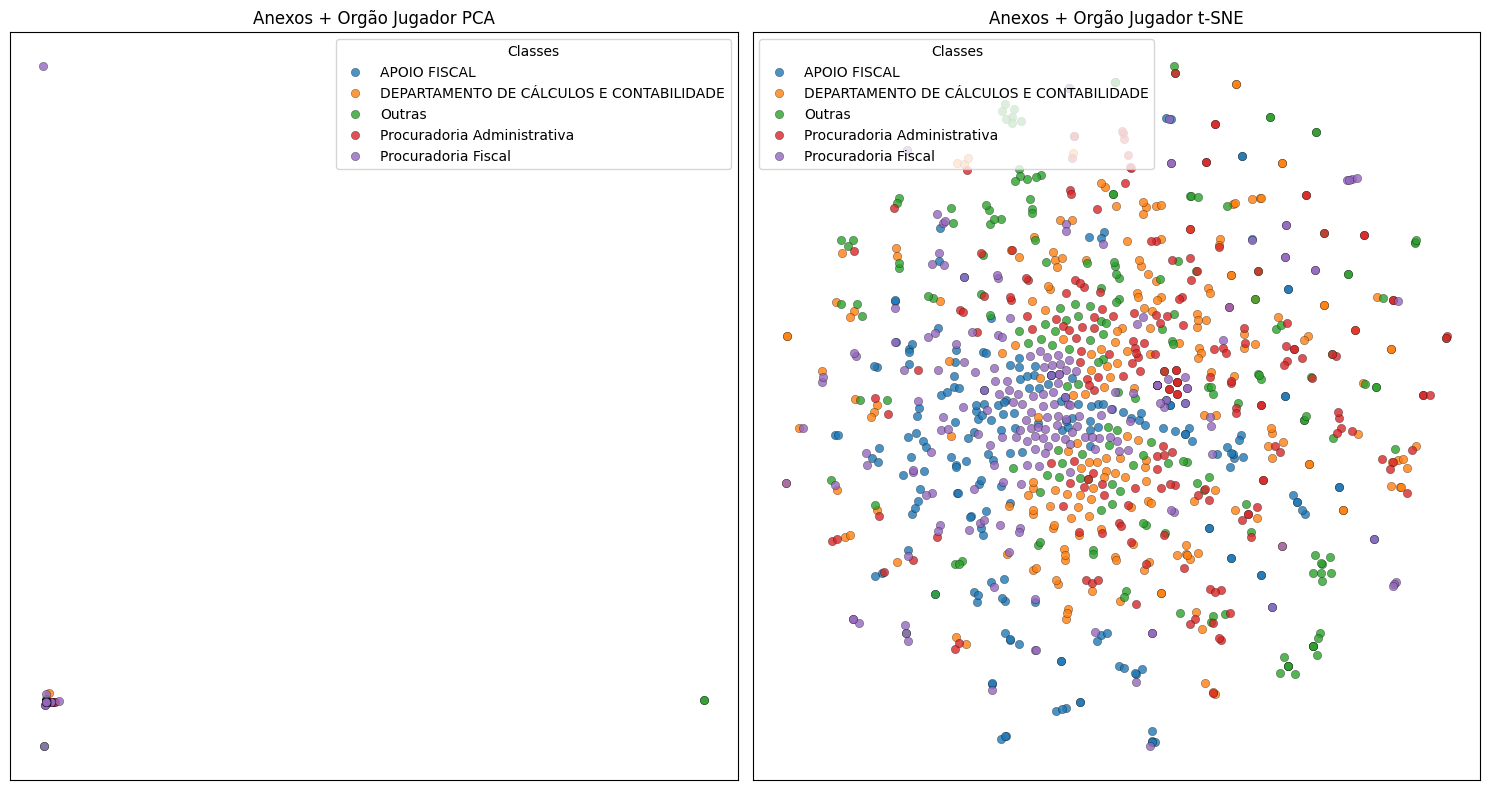

In [122]:
plot_dimensionality_reduction(matrix_agg, labels, n_samples=1000, title='Anexos + Orgão Jugador')

## 1.3 - Orgão Julgador + Classe Processo

In [123]:
matrix_agg = merge_csv('df_orgaoJulgador.csv', 'df_classeProcesso.csv')

In [124]:
print(matrix_agg.shape)

(6327, 108)


In [125]:
print(matrix_agg.shape)

(6327, 108)


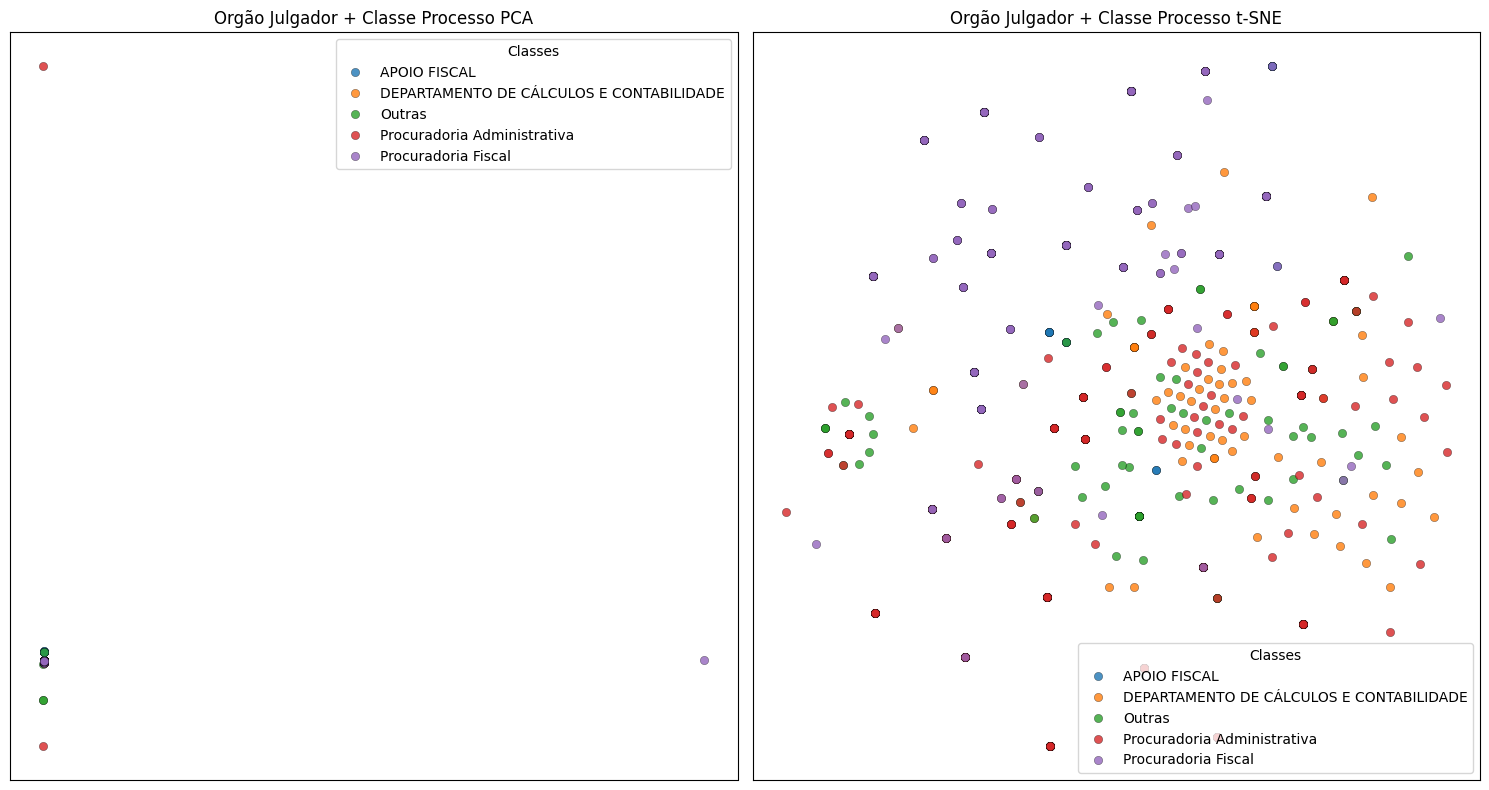

In [126]:
plot_dimensionality_reduction(matrix_agg, labels, n_samples=1000, title='Orgão Julgador + Classe Processo')

## 1.4 - Assuntos + Classe Processo + Orgão Julgador

In [108]:
matrix_agg = merge_csv('df_assuntos.csv', 'df_classeProcesso.csv', 'df_orgaoJulgador.csv')

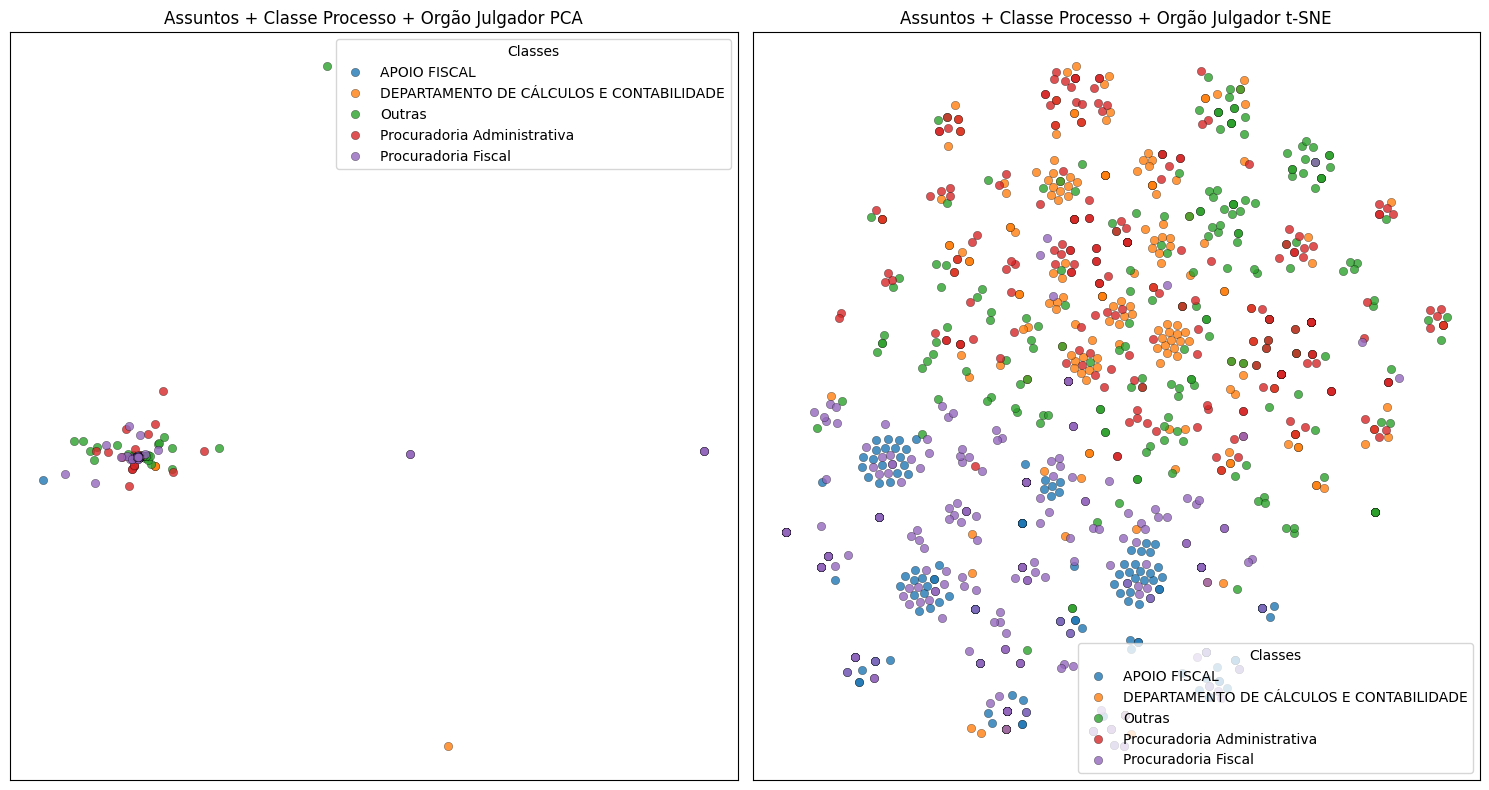

In [109]:
plot_dimensionality_reduction(matrix_agg, labels, n_samples=1000, title='Assuntos + Classe Processo + Orgão Julgador')

## 1.5 - TFIDF + Assuntos

In [128]:
matrix_agg = merge_csv('df_tfidf.csv', 'df_assuntos.csv')

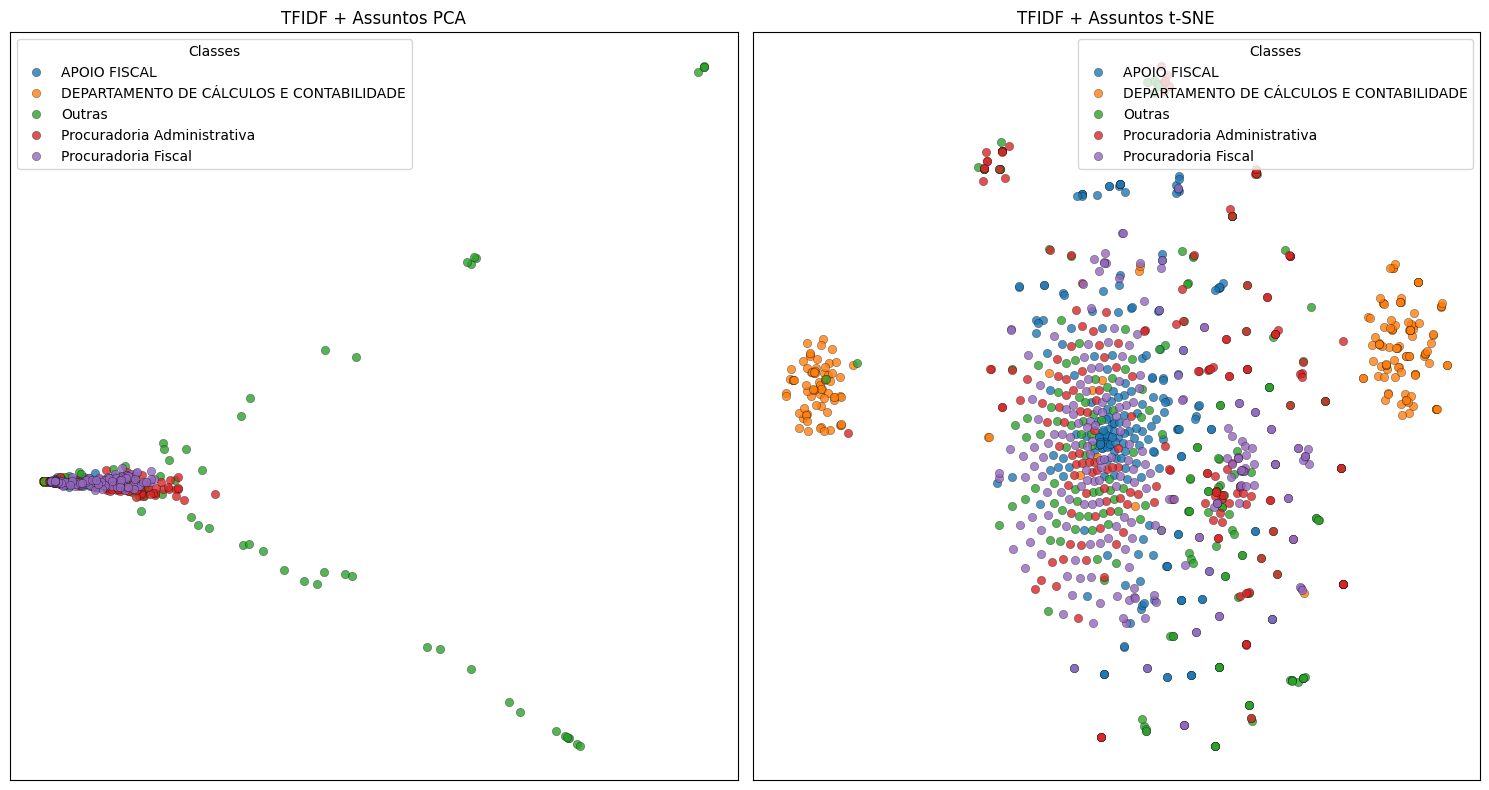

In [129]:
plot_dimensionality_reduction(matrix_agg, labels, n_samples=1000, title='TFIDF + Assuntos')

## 1.6 - TFIDF

In [112]:
matrix_agg = merge_csv('df_tfidf.csv')

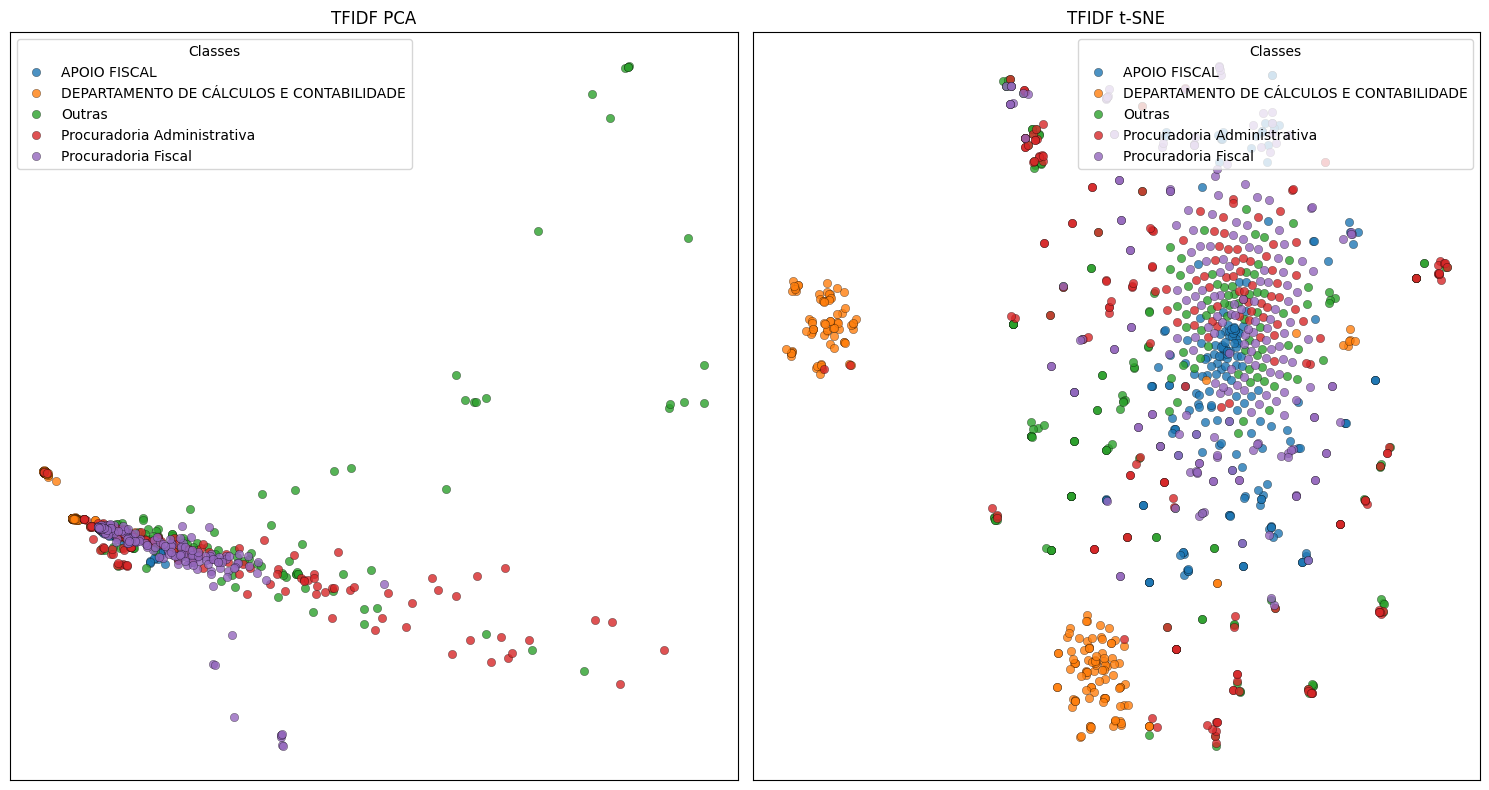

In [113]:
plot_dimensionality_reduction(matrix_agg, labels, n_samples=1000, title='TFIDF')

## 1.7 - Assuntos + Anexos

In [114]:
matrix_agg = merge_csv('df_assuntos.csv', 'df_anexos.csv')

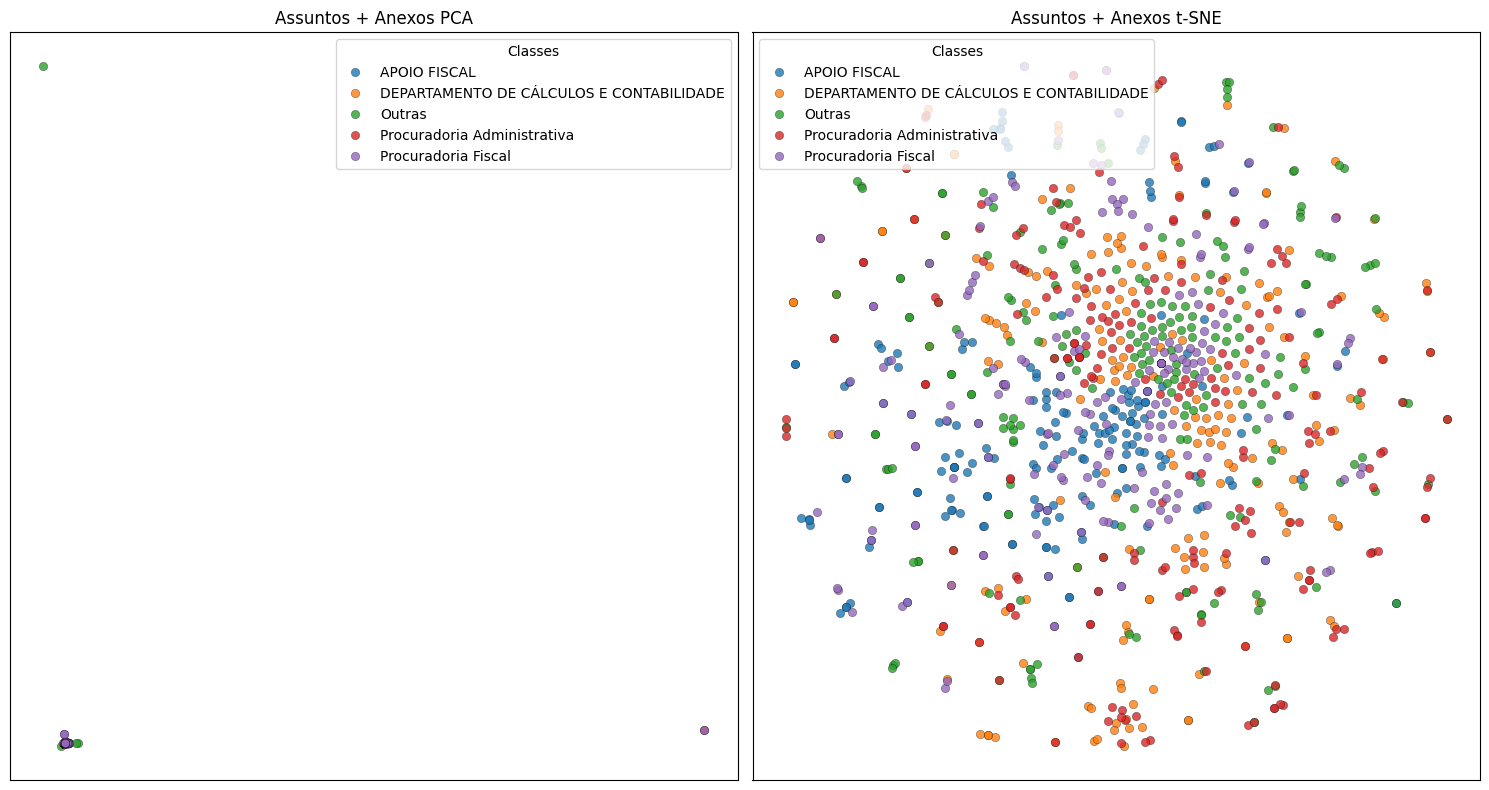

In [115]:
plot_dimensionality_reduction(matrix_agg, labels, n_samples=1000, title='Assuntos + Anexos')

## 1.8 - Assuntos + Classe Processo

In [116]:
matrix_agg = merge_csv('df_assuntos.csv', 'df_classeProcesso.csv')

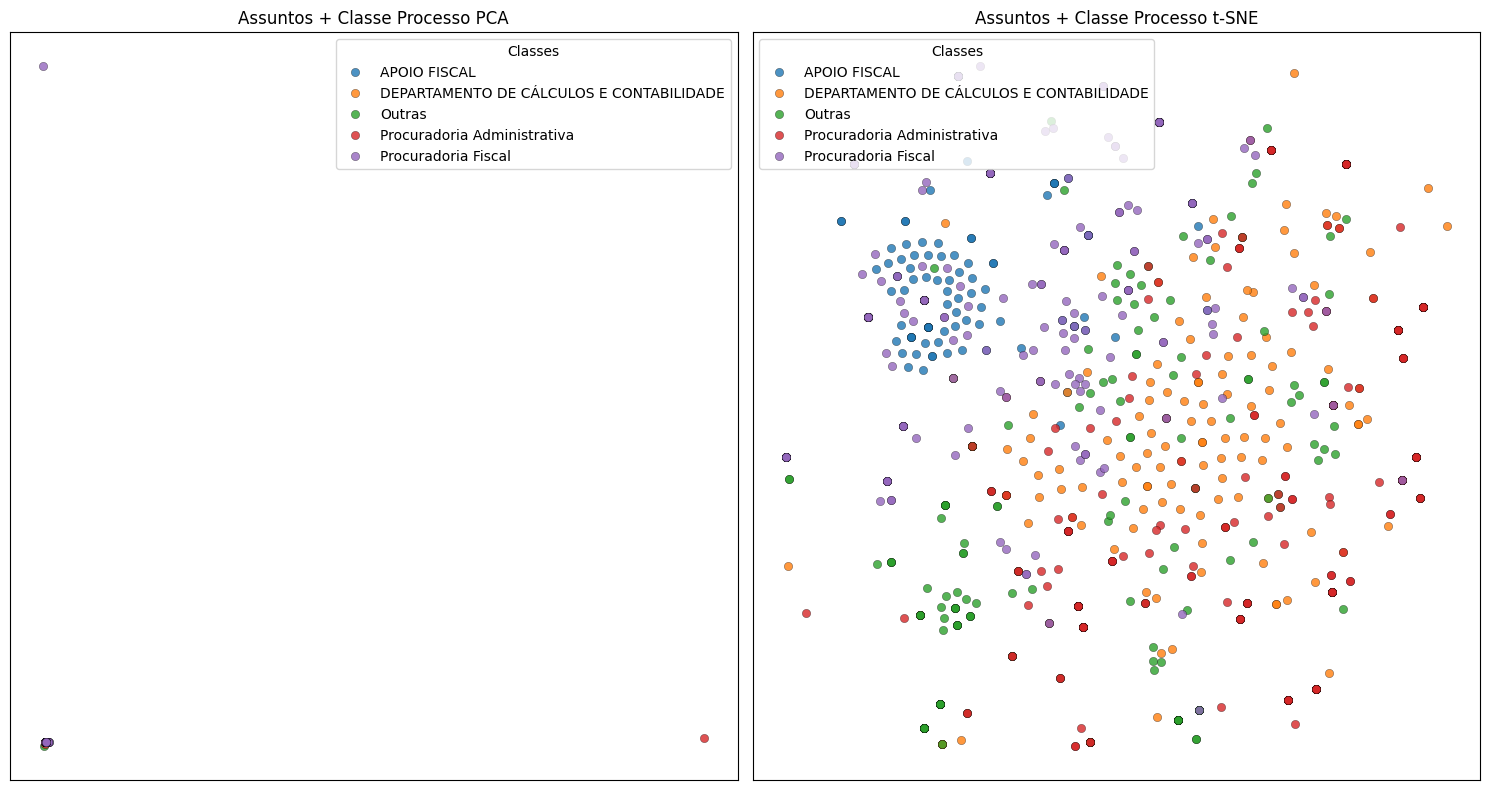

In [117]:
plot_dimensionality_reduction(matrix_agg, labels, n_samples=1000, title='Assuntos + Classe Processo')

## TFIDF + Classe Processo

In [118]:
matrix_agg = merge_csv('df_tfidf.csv', 'df_classeProcesso.csv')

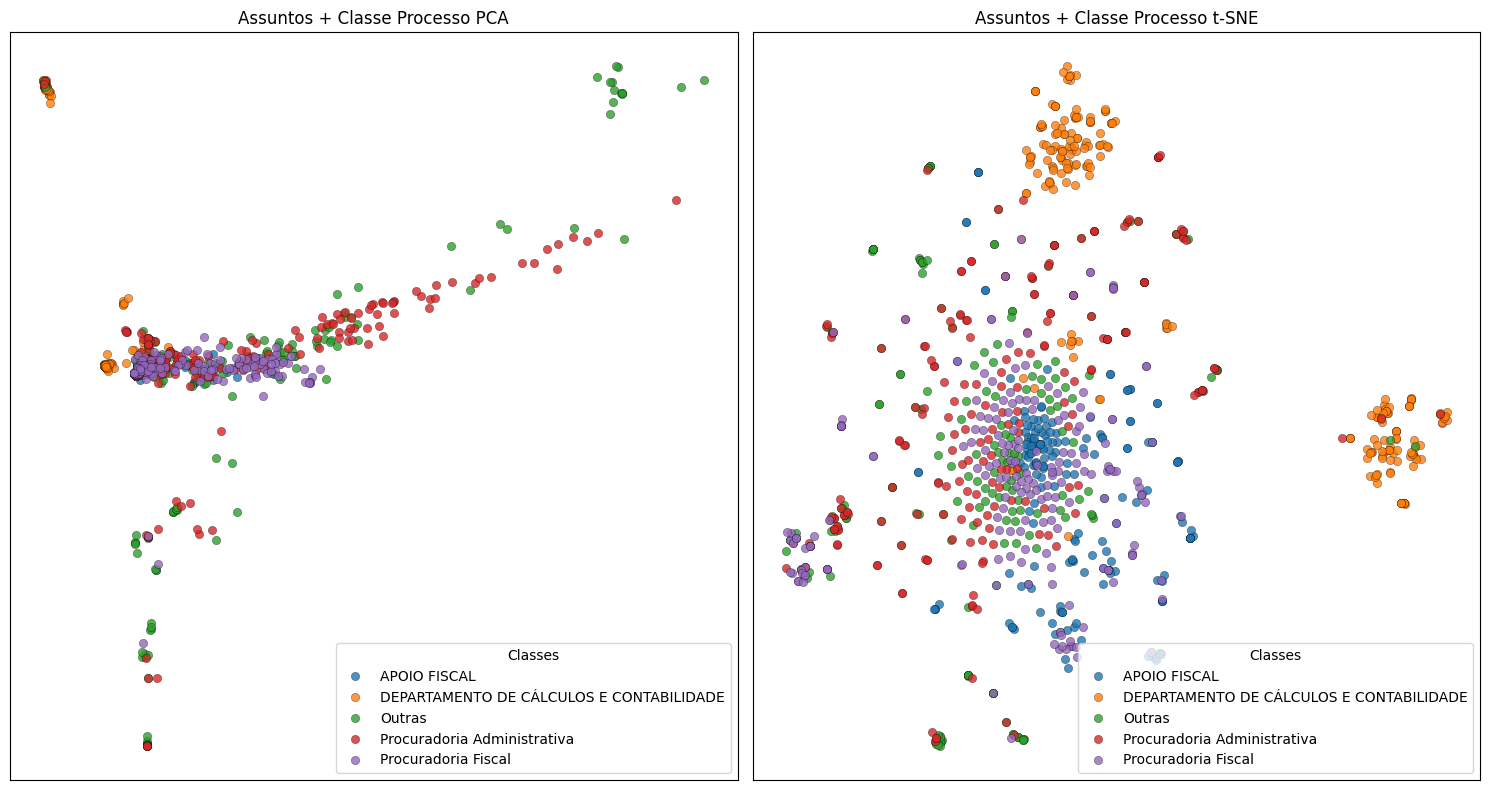

In [119]:
plot_dimensionality_reduction(matrix_agg, labels, n_samples=1000, title='Assuntos + Classe Processo')